<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Logistic Regression
 
_Authors: Multiple_
 
---

_Instructor Note: There are several portions of this lab that are half filled in.  You can use these as independent activity or a refresher walkthrough_

<a id="learning-objectives"></a>
### Learning Objectives
- Recall how to perform linear regression in scikit-learn.
- Demonstrate why logistic regression is a better alternative for classification than linear regression.
- Understand the concepts of probability, odds, e, log, and log-odds in relation to machine learning.
- Explain how logistic regression works.
- Interpret logistic regression coefficients.
- Use logistic regression with categorical features.
- Compare logistic regression with other models.
- Utilize different metrics for evaluating classifier models.
- Construct a confusion matrix based on predicted classes.

# Introduction

In this lesson we learn about Logistic Regression, or what is sometimes referred to as Logistic Classification.

"How can a model be both a Regression and a Classification?" you may ask.  


## Discussion

Have you ever had to sort objects, but everything didn't fit perfectly into groups?

Example:
- Movies/Books
- Socks
- Phone apps


Logistic Regression/Classification uses elements from both the Linear Regression and the K Nearest Neighbors algorithms.

<a id="refresher-fitting-and-visualizing-a-linear-regression-using-scikit-learn"></a>
## Section 1: Fitting and Visualizing a Linear Regression Using scikit-learn
---

Use Pandas to load in the glass attribute data from the UCI machine learning website. The columns are different measurements of properties of glass that can be used to identify the glass type. For detailed information on the columns in this data set, [please see the included .names file](http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names).

In [1]:
# Glass identification data set
import pandas as pd
 # source =  data/glass.csv


In [2]:
glass = pd.read_csv('data/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# change columns to something more uniform
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Data Dictionary**

- `Id`: number: 1 to 214
- `RI`: refractive index  
- `Na`: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K` : Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron
- `Type` : Type of glass:

**Pretend we want to predict `ri`, and our only feature is `al`. How could we do it using machine learning?**

<!--
**Answer:** We could frame it as a regression problem, and use a linear regression model with **`al`** as the only feature and **`ri`** as the response.
-->

**How would we visualize this model?**
<!--
**Answer:** Create a scatter plot with **`al`** on the x-axis and **`ri`** on the y-axis, and draw the line of best fit.
-->

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5);

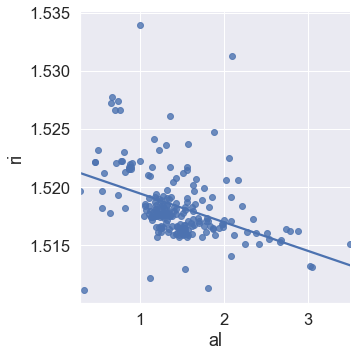

In [5]:
sns.lmplot(x='al', y='ri', data=glass, ci=None);

**How can we draw this plot (just the points — don't worry about the regression line) without using Seaborn?**

Text(0, 0.5, 'ri')

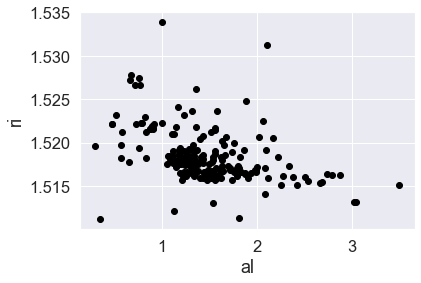

In [6]:
# A:
x = glass.al
y = glass.ri

plt.plot(x, y, 'o', color='black');
plt.xlabel('al')
plt.ylabel('ri')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='al', ylabel='ri'>

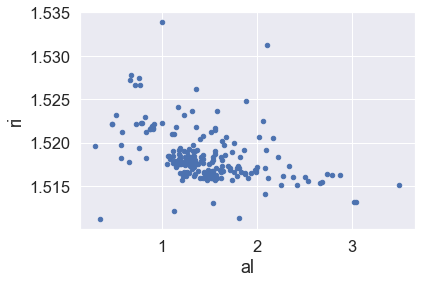

In [7]:
glass.plot(kind='scatter', x='al', y='ri')

To build a linear regression model to predict `ri` using scikit-learn, we will need to Import `LinearRegression` from `linear_model`.

**Using `LinearRegression`, fit a model predicting `ri` from `al` (and an intercept).**

In [8]:
# Fit a linear regression model (name the model "linreg").
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri

linreg.fit(X, y)

LinearRegression()

**Using the `LinearRegression` object we have fit, create a variable that are our predictions for `ri` for each row's `al` in the data set.**

In [9]:
# Make predictions for all values of X and add back to the original DataFrame.
y_pred = linreg.predict(X)

# new column of y_pred
glass['y_pred'] = y_pred

**Plot the predicted `ri` against each `al` as a line.**

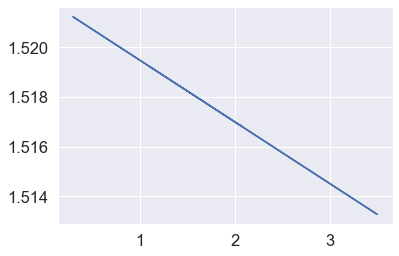

In [10]:
# A:
plt.plot(glass.al, glass.y_pred)

Text(0, 0.5, 'ri predict')

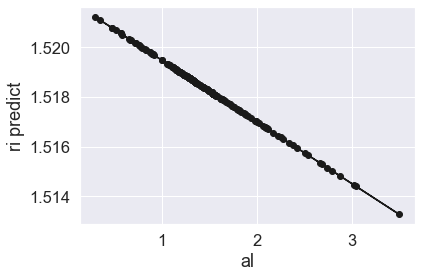

In [11]:
plt.plot(glass.al, glass.y_pred, '-ok');
plt.xlabel('al')
plt.ylabel('ri predict')

_Note the y axis labels when comparing to seaborns plot_

**Plot this regression line with the scatter points on the same chart.**

Text(0, 0.5, 'ri')

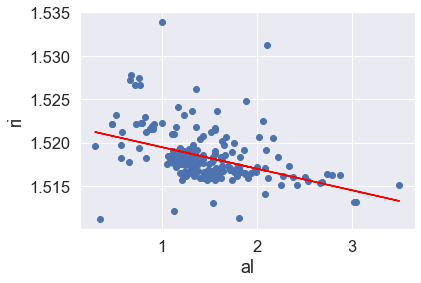

In [12]:
# A:
#This gives you a scatter
plt.scatter(glass.al, glass.ri)
#and plot gives you a straight line
plt.plot(glass.al, glass.y_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

<a id="refresher-interpreting-linear-regression-coefficients"></a>
## Refresher: Interpreting Linear Regression Coefficients
---

Recall the simple linear regression equation is $y = \beta_0 + \beta_1x$

$\beta_0$ is the intercept and $\beta_1$ is, in this case, our coefficient on the `al` predictor.

**Print out the intercept and coefficient values from our fit `LinearRegression` object.**

In [13]:
# A:
print('Intercept: ' + str(linreg.intercept_))
print('Coefficient: ' + str(linreg.coef_))

Intercept: 1.5219453302386425
Coefficient: [-0.00247761]


**Manually compute the predicted value of `ri` when `al=2.0` using the regression equation.**

In [14]:
# A:
linreg.intercept_ + 2.0 * linreg.coef_

#This will mean that the answer isnt an array
#linreg.intercept_ + linreg.coef_[0] * 2

array([1.51699012])

**Confirm that this is the same value we would get when using the built-in `.predict()` method of the `LinearRegression` object.**

In [15]:
# A:
new_values=[[2]] 
linreg.predict(new_values)

array([1.51699012])

In [16]:
linreg.predict([[2]])

array([1.51699012])

---

<a id="predicting-a-categorical-response"></a>
## Predicting a Single Categorical Response
---

Linear regression is appropriate when we want to predict the value of a continuous target/response variable, but what about when we want to predict membership in a class or category?

**Examine the glass type column in the data set. What are the counts in each category?**

In [17]:
glass.head(5)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873


In [18]:
# Examine glass_type.
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new `household` column that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**

In [19]:
# Types 1, 2, 3 are window glass.
# Types 5, 6, 7 are household glass.
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0


In [20]:
glass.household.value_counts().sort_index()

0    163
1     51
Name: household, dtype: int64

Let's change our task, so that we're predicting the `household` category using `al`. Let's visualize the relationship to figure out how to do this.

**Make a scatter plot comparing `al` and `household`.**

Text(0, 0.5, 'household')

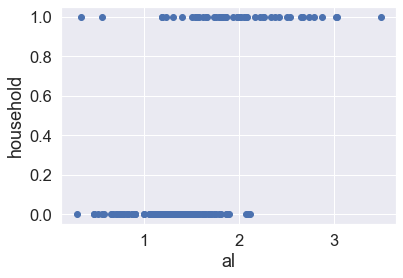

In [21]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

**Fit a new `LinearRegression` predicting `household` from `al`.**



In [22]:
# A:
linreg = LinearRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

linreg.fit(X,y)

y_pred = linreg.predict(X)

# overwrite y_pred
glass['y_pred'] = y_pred
glass

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,0.065459,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,0.195765,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,0.285976,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,0.160682,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,0.135623,0
...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,0.957554,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,0.511506,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,0.526541,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,0.486447,1


Let's draw a regression line like we did before:

Text(0, 0.5, 'household')

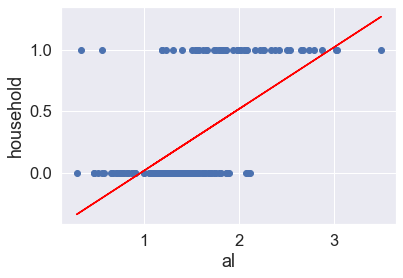

In [23]:
plt.scatter(glass.al, glass.household)
#and plot gives you a straight line
plt.plot(glass.al, glass.y_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

#### If al=3 what class do we predict for household?

In [24]:
# A:
#We round because an answer can only be 0 or 1
round(linreg.predict([[3]])[0])

1

In [25]:
print('Intercept: ' + str(linreg.intercept_))
print('Coefficient: ' + str(linreg.coef_[0]))

round(linreg.intercept_ + linreg.coef_[0] * 3)

Intercept: -0.4858361691974764
Coefficient: 0.5011770001237345


1

#### If al=1.5, what class do we predict for household?

In [26]:
# A:
round(linreg.predict([[1.5]])[0])

0

#### Where is the cutoff value for predicting what class a household is?

In [27]:
# A:
x = 1
while True:
     x = x+0.0001   
     y = round(linreg.predict([[x]])[0])
     if y == 1:
        break
        
print(round(x,4))

1.9671


Click here for solution

<span style ='color:white'>

Around 2

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

**Using this threshold, create a new column of our predictions for whether a row is household glass.**

In [28]:
# Understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False.
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [29]:
# Transform household_pred to 1 or 0.
glass['household_pred'] = glass['y_pred']
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0.065459,0,0.065459,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0.195765,0,0.195765,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0.285976,0,0.285976,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0.160682,0,0.160682,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0.135623,0,0.135623,0


**Plot a line that shows our predictions for class membership in household vs. not.**

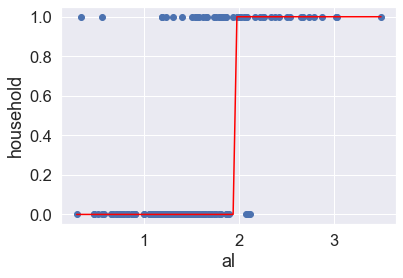

In [30]:
# sort so we can have a continuous line
glass.sort_values('al', inplace=True)
# Plot the class predictions.
plt.scatter(glass.al, glass.household)

plt.xlabel('al')
plt.ylabel('household')

plt.plot(glass.al, glass.household_pred_class, color='red')
plt.show()

#### Do we think our linear regression model is a good fit?

In [31]:
# A:

<a id="using-logistic-regression-for-classification"></a>
## Section 2: Using Logistic Regression for Classification
---

Logistic regression is a more appropriate method for what we just did with a linear regression. The values output from a linear regression cannot be interpreted as probabilities of class membership since their values can be greater than 1 and less than 0. Logistic regression, on the other hand, ensures that the values output as predictions can be interpreted as probabilities of class membership.

**Import the `LogisticRegression` class from `linear_model` below and fit the same regression model predicting `household` from `al`.**

In [32]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)

**Plot the predicted class using the logistic regression as we did for the linear regression predictions above.**

As you can see, the class predictions are the same.

In [33]:
logreg.predict_proba(X)

array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403],
       [0.98614074, 0.01385926],
       [0.98614074, 0.01385926],
       [0.98526292, 0.01473708],
       [0.9817376 , 0.0182624 ],
       [0.98117062, 0.01882938],
       [0.98058638, 0.01941362],
       [0.97806663, 0.02193337],
       [0.97738831, 0.02261169],
       [0.9752281 , 0.0247719 ],
       [0.9752281 , 0.0247719 ],
       [0.97367755, 0.02632245],
       [0.97286725, 0.02713275],
       [0.97203273, 0.02796727],
       [0.96937691, 0.03062309],
       [0.96843851, 0.03156149],
       [0.96843851, 0.03156149],
       [0.9643993 , 0.0356007 ],
       [0.9643993 , 0.0356007 ],
       [0.96331414, 0.03668586],
       [0.96219721, 0.03780279],
       [0.96104764, 0.03895236],
       [0.96104764, 0.03895236],
       [0.95986458, 0.04013542],
       [0.94755733, 0.05244267],
       [0.94755733, 0.05244267],
       [0.

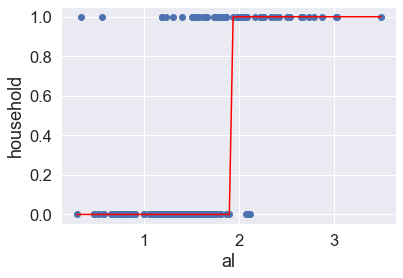

In [34]:
# Plot the class predictions.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')
plt.show()

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

**Using the built-in `.predict_proba()` function, examine the predicted probabilities for the first handful of rows of `X`.**

In [35]:
logreg.predict_proba(X)[0:10]

array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403],
       [0.98614074, 0.01385926],
       [0.98614074, 0.01385926],
       [0.98526292, 0.01473708],
       [0.9817376 , 0.0182624 ],
       [0.98117062, 0.01882938]])

Sklearn orders the columns according to our class labels. The two-column output of `predict_proba` returns a column for each class of our `household` variable. The first column is the probability of `household=0` for a given row, and the second column is the probability of `household=1`.

**Store the predicted probabilities of class=1 in its own column in the data set.**

In [36]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [37]:
glass.head(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,-0.340495,0,-0.340495,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,-0.315436,1,-0.315436,0,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,-0.250283,0,-0.250283,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,-0.250283,0,-0.250283,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,-0.230236,0,-0.230236,0,0.011884
183,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.0,0.00,6,-0.205177,1,-0.205177,0,0.013859
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.00,2,-0.205177,0,-0.205177,0,0.013859
157,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.0,0.00,3,-0.195154,0,-0.195154,0,0.014737
152,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.0,0.00,3,-0.160071,0,-0.160071,0,0.018262
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.0,0.00,2,-0.155059,0,-0.155059,0,0.018829


**Plot the predicted probabilities as a line on our plot (probability of `household=1` as `al` changes).**

Text(0, 0.5, 'household')

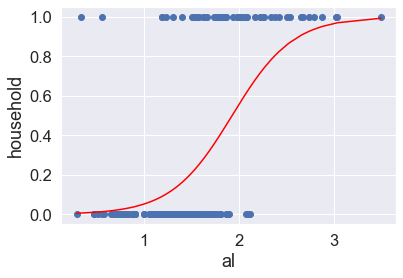

In [38]:
# Plot the predicted probabilities.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

### Exercise 1:

- Build and train a logistic regression model.
- Select 2 features for you X
- Use train_test_split to subset your data
- y will remain the same `glass.household`
- Evaluate the model with `model.score` on the testing data.

In [39]:
# A:
logreg = LogisticRegression()

feature_cols = ['al','si']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)

In [40]:
logreg.predict_proba(X)

array([[0.99722393, 0.00277607],
       [0.9509651 , 0.0490349 ],
       [0.99594685, 0.00405315],
       [0.99594685, 0.00405315],
       [0.99546279, 0.00453721],
       [0.97858365, 0.02141635],
       [0.95404579, 0.04595421],
       [0.99412769, 0.00587231],
       [0.98056011, 0.01943989],
       [0.99717011, 0.00282989],
       [0.99055734, 0.00944266],
       [0.99253057, 0.00746943],
       [0.99100921, 0.00899079],
       [0.97979717, 0.02020283],
       [0.97157945, 0.02842055],
       [0.96647289, 0.03352711],
       [0.99216754, 0.00783246],
       [0.98646329, 0.01353671],
       [0.98510237, 0.01489763],
       [0.93577451, 0.06422549],
       [0.98962226, 0.01037774],
       [0.97727269, 0.02272731],
       [0.97901064, 0.02098936],
       [0.98462997, 0.01537003],
       [0.98876215, 0.01123785],
       [0.98047113, 0.01952887],
       [0.97728195, 0.02271805],
       [0.98801902, 0.01198098],
       [0.99392084, 0.00607916],
       [0.95501716, 0.04498284],
       [0.

In [41]:
glass['household_pred_prob_2'] = logreg.predict_proba(X)[:, 1]

In [42]:
glass['household_pred_class2'] = np.where(glass.household_pred_prob_2 >= 0.5, 1, 0)
glass

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class,household_pred_prob,household_pred_prob_2,household_pred_class2
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,-0.340495,0,-0.340495,0,0.006024,0.002776,0
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,-0.315436,1,-0.315436,0,0.007032,0.049035,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,-0.250283,0,-0.250283,0,0.010506,0.004053,0
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,-0.250283,0,-0.250283,0,0.010506,0.004053,0
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,-0.230236,0,-0.230236,0,0.011884,0.004537,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,0.912448,1,0.912448,1,0.935956,0.967241,1
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,0.957554,1,0.957554,1,0.950845,0.951916,1
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1.027718,1,1.027718,1,0.967657,0.868257,1
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1.037742,1,1.037742,1,0.969552,0.854644,1


In [43]:
glass['pred2correct'] = (glass.household == glass.household_pred_class2)

In [44]:
glass

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class,household_pred_prob,household_pred_prob_2,household_pred_class2,pred2correct
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,-0.340495,0,-0.340495,0,0.006024,0.002776,0,True
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,-0.315436,1,-0.315436,0,0.007032,0.049035,0,False
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,-0.250283,0,-0.250283,0,0.010506,0.004053,0,True
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,-0.250283,0,-0.250283,0,0.010506,0.004053,0,True
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,-0.230236,0,-0.230236,0,0.011884,0.004537,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,0.912448,1,0.912448,1,0.935956,0.967241,1,True
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,0.957554,1,0.957554,1,0.950845,0.951916,1,True
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1.027718,1,1.027718,1,0.967657,0.868257,1,True
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1.037742,1,1.037742,1,0.969552,0.854644,1,True


In [45]:
glass.pred2correct.value_counts().sort_index()

False     28
True     186
Name: pred2correct, dtype: int64

In [46]:
186 / (28 + 186)

0.8691588785046729

In [47]:
from sklearn.model_selection import train_test_split


feature_cols=['na','k']
X=glass[feature_cols]
y=glass.household

X_train, X_test, y_train, y_test =train_test_split(X,y,train_size=0.75)

lr=LogisticRegression().fit(X_train,y_train)

print('Score: ' + str(lr.score(X_test,y_test)))

Score: 0.8703703703703703


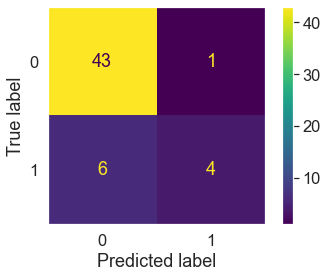

In [48]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,X_test,y_test)
plt.grid(False)

In [49]:
recall_score(y_test,y_pred)

NameError: name 'recall_score' is not defined

<a id="interpreting-logistic-regression-coefficients"></a>
### Extend: Interpreting Logistic Regression Coefficients




#### Use the `.coef_` function to evaluate the coefficients of your model, what do you think these mean?

In [ ]:
# A:

Click here for solution

<span style ='color:white'>
    
It is not as easy to interpret coefficients for logistic regression models, and it is an interesting read if you would like to do some more research. But in effect, if the coefficient is positive, it means for every 1 unit increase of that feature, the chance it assigns the default label is increasing while the opposite is true for negative coefficients.

<a id="advanced-classification-metrics"></a>
## Section 3: Classification Metrics

---

When we evaluate the performance of a logistic regression (or any classifier model), the standard metric to use is accuracy: How many class labels did we guess correctly? However, accuracy is only one of several metrics we could use when evaluating a classification model.

$$Accuracy = \frac{total~predicted~correct}{total~predicted}$$

Accuracy alone doesn’t always give us a full picture.

If we know a model is 75% accurate, it doesn’t provide any insight into why the 25% was wrong.

Consider a binary classification problem where we have 165 observations/rows of people who are either smokers or nonsmokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

There are 60 in class 0, nonsmokers, and 105 observations in class 1, smokers
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

We have 55 predictions of class, predicted as nonsmokers, and 110 of class 1, predicted to be smokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

- **True positives (TP):** These are cases in which we predicted yes (smokers), and they actually are smokers.
- **True negatives (TN):** We predicted no, and they are nonsmokers.
- **False positives (FP):** We predicted yes, but they were not actually smokers. (This is also known as a "Type I error.")
- **False negatives (FN):** We predicted no, but they are smokers. (This is also known as a "Type II error.")
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Categorize these as TP, TN, FP, or FN:**

Try not to look at the answers above.
    
- We predict nonsmoker, but the person is a smoker.
- We predict nonsmoker, and the person is a nonsmoker.
- We predict smoker and the person is a smoker.
- We predict smoker and the person is a nonsmoker.

<!--ANSWER
- FN
- TN
- TP
- FP
-->

<a id="accuracy-true-positive-rate-and-false-negative-rate"></a>
### Accuracy, True Positive Rate, and False Negative Rate

**Accuracy:** Overall, how often is the classifier correct?

<span>
    (<span style="color: green">TP</span>+<span style="color: red">TN</span>)/<span style="color: blue">total</span> = (<span style="color: green">100</span>+<span style="color: red">50</span>)/<span style="color: blue">165</span> = 0.91
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom; color: blue">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center; background-color: red">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center; background-color: green">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**True positive rate (TPR) aka Recall** asks, “Out of all of the target class labels, how many were accurately predicted to belong to that class?”

For example, given a medical exam that tests for cancer, how often does it correctly identify patients with cancer?

<span>
<span style="color: green">TP</span>/<span style="color: blue">actual yes</span> = <span style="color: green">100</span>/<span style="color: blue">105</span> = 0.95
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center;background-color: green">TP = 100</td>
    <td style="text-align: center;color: blue">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**False positive rate (FPR) aka Specificity** asks, “Out of all items not belonging to a class label, how many were predicted as belonging to that target class label?”

For example, given a medical exam that tests for cancer, how often does it trigger a “false alarm” by incorrectly saying a patient has cancer?

<span>
<span style="color: orange">FP</span>/<span style="color: blue">actual no</span> = <span style="color: orange">10</span>/<span style="color: blue">60</span> = 0.17
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center;background-color: orange">FP = 10</td>
    <td style="text-align: center;color:blue">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Can you see that we might weigh TPR AND FPR differently depending on the situation?**

- Give an example when we care about TPR, but not FPR.
- Give an example when we care about FPR, but not TPR.

<!--
ANSWER:
- During an initial medical diagnosis, we want to be sensitive. We want initial screens to come up with a lot of true positives, even if we get a lot of false positives.
- If we are doing spam detection, we want to be precise. Anything that we remove from an inbox must be spam, which may mean accepting fewer true positives.
-->

**More Trade-Offs**

The precision, recall and specificity rates gives us a much clearer picture of where predictions begin to fall apart.

This allows us to adjust our models accordingly.

**Below we will load in some data on admissions to college.**

In [50]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

admissions = pd.read_csv('data/admissions.csv')
admissions = admissions.dropna()
# Get dummy variables for prestige.
admissions = admissions.join(pd.get_dummies(admissions['prestige'], prefix='prestige'))
admissions.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1


**We can predict the `admit` class from `gre` and use a train-test split to evaluate the performance of our model on a held-out test set.**

In [74]:
X = admissions[['gre']]
y = admissions['admit']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=46)
logit_simple = LogisticRegression().fit(X_train, y_train)

**Recall that our "baseline" accuracy is the proportion of the majority class label.**

#### Using `value_counts(normalize=True).max()` to calculate the baseline accuracy of this dataset

In [ ]:
# A:

Click here for solution

<span style ='color:white'>

admissions['admit'].value_counts(normalize=True).max()

#### Calculate the accuracy of your model using the test set and compare it to the baseline accuracy

In [ ]:
# A:

Click here for solution

<span style ='color:white'>

logit_simple.score(X_test,y_test)

**Create a confusion matrix of predictions on our test set using `plot_confusion_matrix`**.


In [ ]:
# A:

Click here for solution

<span style ='color:white'>

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(logit_simple,X_test,y_test)
plt.grid(False)

#### Calculate precision and recall for your model

In [ ]:
# A:

Click here for solution

<span style ='color:white'>

from sklearn.metrics import precision_score, recall_score, classification_report

y_pred=logit_simple.predict(X_test)

print('Recall: ' +str(recall_score(y_pred,y_test)))
print('Precision: ' +str(precision_score(y_pred,y_test)))
print(classification_report(y_pred,y_test))

### Extend: Changing the Threshold

Sometimes we will want to adjust the rate of which we get false negatives or false positives, and we can do this by changing the threshold where the classifier assigns the label. 

The code below allows you to change the threshold of where a label is assigned, play around with it to see how it affects the confusion matrix

In [96]:
import pandas as pd
from sklearn.metrics import confusion_matrix

def confusion_threshold(threshold,feature_array, target):
    # Get probability predictions.
    logit_pred_proba = logit_simple.predict_proba(feature_array)[:,1]
    
    # Build a confusion matrix, where we can change the threshold
    conf_mat=pd.DataFrame(confusion_matrix(y_true=target, y_pred=logit_pred_proba > .3),
             columns=['Predict False','Predict True'],
             index=['Actual False','Actual True'])
    
    return conf_mat    

In [97]:
confusion_threshold(0.3,X_test,y_test)

,Predict False,Predict True
Actual False,37,27
Actual True,10,26


A good classifier would have a true positive rate approaching 1 and a false positive rate approaching 0.

In our smoking problem, this model would accurately predict all of the smokers as smokers and not accidentally predict any of the nonsmokers as smokers.

### Trading True Positives and True Negatives

By default, and with respect to the underlying assumptions of logistic regression, we predict a positive class when the probability of the class is greater than .5 and predict a negative class otherwise.

What if we decide to use .3 as a threshold for picking the positive class? Is that even allowed?

This turns out to be a useful strategy. By setting a lower probability threshold we will predict more positive classes. Which means we will predict more true positives, but fewer true negatives.

Making this trade-off is important in applications that have imbalanced penalties for misclassification.

The most popular example is medical diagnostics, where we want as many true positives as feasible. For example, if we are diagnosing cancer we prefer to have false positives, predict a cancer when there is no cancer, that can be later corrected with a more specific test.

We do this in machine learning by setting a low threshold for predicting positives which increases the number of true positives and false positives, but allows us to balance the the costs of being correct and incorrect.

## Lesson Review
- **Logistic regression**
  - What kind of machine learning problems does logistic regression address?
  - What do the coefficients in a logistic regression represent? How does the interpretation differ from ordinary least squares? How is it similar?
  
- **The confusion matrix**
  - How do true positive rate and false positive rate help explain accuracy?
  - Why might one classification metric be more important to tune than another? Give an example of a business problem or project where this would be the case.